In [1]:
import tensorflow as tf  
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

In [36]:
# El numero de neuronas de la imagen codificada
layer1_dim = 512
layer2_dim = 256
encoding_dim = 128 

# La imagen de input
input_img = keras.Input(shape=(784,))
# ecoded es la primera capa e la red neuronal
encoded = keras.layers.Dense(layer1_dim, activation='relu')(input_img)
# encoded ahora es la segunda capa e la red neuronal
encoded = keras.layers.Dense(layer2_dim, activation='relu')(encoded)
# encoded es la ultima representacion codificada de la imagen en dimensiones menores
encoded = keras.layers.Dense(encoding_dim, activation='relu')(encoded)

# decoded amplia las dimensiones a layer2_dim
decoded = keras.layers.Dense(layer2_dim, activation='relu')(encoded)
# decoded amplia las dimensiones a layer21_dim
decoded = keras.layers.Dense(layer1_dim, activation='relu')(decoded)
# "decoded" es la reconstruccion de la imagen a partir de la informacion codificada
decoded = keras.layers.Dense(784, activation='sigmoid')(decoded)

# Este es el modelo desde la imagen -> codificacion -> imagen reconstruida
autoencoder = keras.Model(input_img, decoded)

In [37]:
# Este modelo codifica la imagen original 
encoder = keras.Model(input_img, encoded)

In [38]:
# El input es la imagen codificada de dim=128
encoded_input = keras.Input(shape=(encoding_dim,))
# Se recupera las ultimas capa del modelo completo de autoencoder
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
# Se crea el modelo de decodificador
decoder = keras.Model(encoded_input, decoder_layer3(
                                     decoder_layer2(
                                     decoder_layer1(encoded_input))))

In [39]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [40]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [41]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=10,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.1449 - val_loss: 0.0962
Epoch 2/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0947 - val_loss: 0.0915
Epoch 3/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0904 - val_loss: 0.0883
Epoch 4/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0878 - val_loss: 0.0863
Epoch 5/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0860 - val_loss: 0.0845
Epoch 6/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0848 - val_loss: 0.0851
Epoch 7/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0836 - val_loss: 0.0833
Epoch 8/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0826 - val_loss: 0.0829
Epoch 9/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0819 - val_loss: 0.0813
Epoch 10/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.081

In [42]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

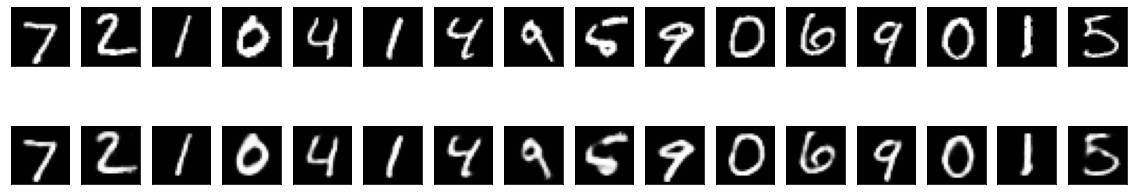

In [43]:
n =16 # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

[[6.06868824e+00 8.86560164e-03 4.35839956e+00 1.94494787e+00
  1.73689853e+00 8.43347713e+00 3.55395178e+00 3.47548543e+00
  2.03463627e+00 5.54027063e-02 4.96493426e+00 3.84454441e+00
  3.17996933e-01 5.56851001e-01 4.01597879e+00 1.58710087e+00
  6.92037104e+00 1.37796831e+00 2.77111800e+00 4.09880976e+00
  1.46871319e+00 4.42953601e+00 9.01477392e+00 6.02653687e+00
  3.26279976e+00 4.21057253e+00 4.30122793e+00 5.80871070e+00
  6.92740071e+00 1.94074868e-01 4.42234193e+00 3.31899643e+00
  7.76227008e+00 8.11786401e-01 4.99736196e+00 2.67001070e+00
  2.04724505e+00 8.79389572e+00 1.05643262e+00 7.96944110e+00
  2.61729998e+00 6.21169491e+00 1.88455842e+00 4.52056468e+00
  4.28299098e+00 5.54463962e+00 5.39962107e+00 6.38735045e+00
  3.89416472e+00 3.15478665e+00 4.97785692e+00 4.94700660e+00
  3.70226438e+00 4.05034619e+00 1.33395409e+00 1.01350182e+01
  5.37976177e+00 1.90294732e-01 2.86172162e+00 4.12963174e+00
  2.89719911e+00 1.33862222e+00 2.11701787e+00 1.81854816e+00
  4.7968

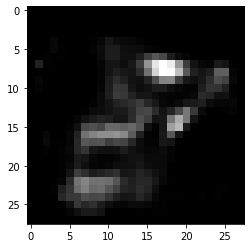

In [44]:
# Se decodifica un input aleatorio de valores

random_noise_img = randn(encoding_dim).reshape(1,encoding_dim)
print(abs(random_noise_img*5))
decoded_random = decoder.predict(abs(random_noise_img))
plt.imshow(decoded_random.reshape(28, 28))

[[0.         0.         1.70941901 1.49519253 0.         0.
  0.         1.64057422 0.83385277 0.         0.         1.01817226
  0.08798762 0.         0.         0.         1.21808171 0.
  0.         0.55733925 0.         0.         0.         1.07318592
  3.40450215 2.73579884 1.7268641  0.         0.         0.87637395
  0.         0.         1.57789934 1.89388418 0.         0.
  0.78603661 1.06227565 0.95605183 0.         0.         0.32163283
  0.         0.         1.1130724  0.         1.58597136 1.63105071
  0.         2.54115915 1.18097234 0.         1.09041154 1.32971549
  0.         0.         1.46747315 0.25657839 0.         0.83521342
  0.35272646 0.         0.         1.07754409 0.         0.
  0.         0.         0.         0.         0.         0.94421238
  0.         0.90676546 0.599774   0.19377799 0.         0.
  0.         0.         0.         0.         0.39624056 0.
  1.015558   0.41445476 0.         0.         2.17463374 0.
  0.         0.         0.         0

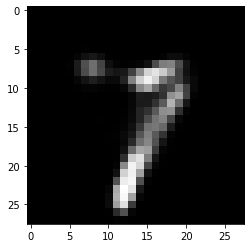

In [45]:
avrg =[]
for a,b in zip(encoded_imgs[0], encoded_imgs[2]):
    avrg.append((a+b)/2)
avrg = np.array(avrg).reshape(1,encoding_dim)
print(avrg)
avrg_num = decoder.predict(avrg)
plt.imshow(avrg_num.reshape(28,28))